In [1]:
%matplotlib inline
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [3]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


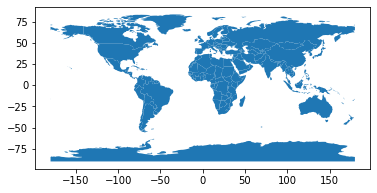

In [4]:
world.plot()

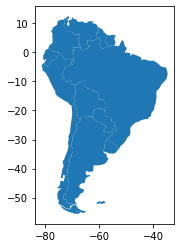

In [5]:
world.loc[world["continent"] == "South America"].plot()

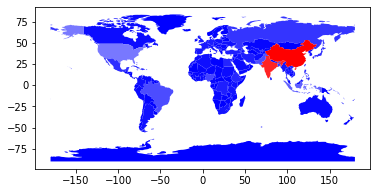

In [6]:
world.plot(column="pop_est", cmap="bwr")

There are many ways to project Latitude and Longitude to a map. These are known as 
[map projections](https://en.wikipedia.org/wiki/Map_projection).
Geopandas tracks them in a 
[coordinate reference system](https://geopandas.org/projections.html). 
We can look up other projections at
https://spatialreference.org/

In [7]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
albers = world.to_crs("EPSG:3310")

In [9]:
albers.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - California
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

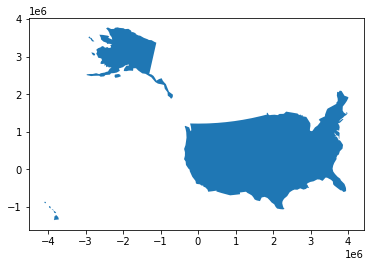

In [10]:
albers[albers["name"] == "United States of America"].plot()

In [11]:
world['centroid_column'] = world.centroid

<ipython-input-11-fe814c1a773b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroid_column'] = world.centroid


In [12]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroid_column
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",POINT (163.85316 -17.31631)
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",POINT (34.75299 -6.25773)
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",POINT (-12.13783 24.29117)
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",POINT (-98.14238 61.46908)
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",POINT (-112.59944 45.70563)
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",POINT (20.81965 44.23304)
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",POINT (19.28618 42.78904)
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",POINT (20.89536 42.57937)
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",POINT (-61.33037 10.42824)


In [13]:
world = world.set_geometry('centroid_column')

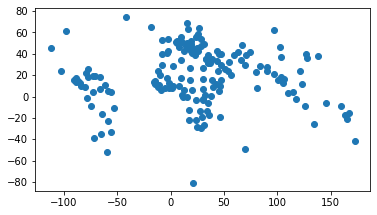

In [14]:
world.plot();

In [15]:
# Census Data TIGER
us = geopandas.read_file("data/tl_2017_us_state/tl_2017_us_state.shp")

In [16]:
us

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"MULTIPOLYGON (((-82.98748 24.62538, -82.98748 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677997539,1323452846,+41.5974187,-071.5272723,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214048160737,2393355752,+44.3484222,-114.5588538,"POLYGON ((-116.89971 44.84061, -116.89967 44.8..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23187445452,1028643155,+43.6726907,-071.5843145,"POLYGON ((-72.32990 43.60021, -72.32984 43.600..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125919712692,13470113896,+35.5397100,-079.1308636,"POLYGON ((-82.41674 36.07283, -82.41660 36.073..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23873457570,1031134839,+44.0604795,-072.6733274,"POLYGON ((-73.31328 44.26413, -73.31274 44.265..."


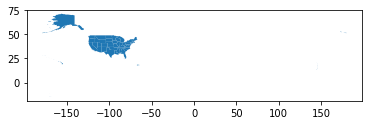

In [17]:
us.plot()

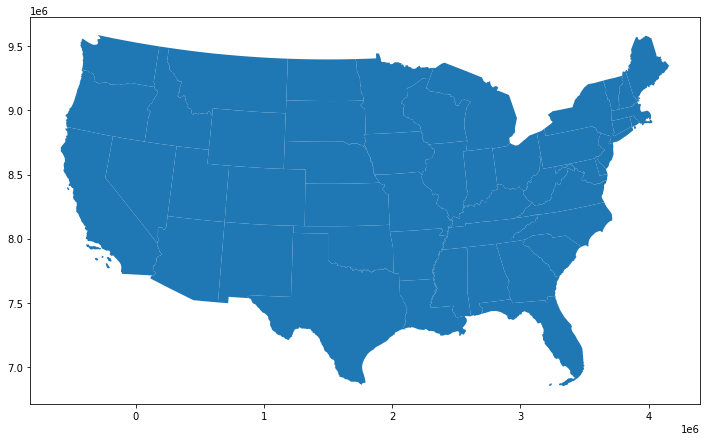

In [18]:
continental = us[us["STUSPS"] != "HI"]
continental = continental[continental["STUSPS"] != "AK"]
continental = continental[continental["STUSPS"] != "PR"]
continental = continental[continental["STUSPS"] != "VI"]
continental = continental[continental["STUSPS"] != "MP"]
continental = continental[continental["STUSPS"] != "AS"]
continental = continental[continental["STUSPS"] != "GU"]
continental = continental.to_crs("EPSG:3083")
continental.plot(figsize=(12, 12))

In [19]:
continental.crs

<Projected CRS: EPSG:3083>
Name: NAD83 / Texas Centric Albers Equal Area
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - Texas
- bounds: (-106.66, 25.83, -93.5, 36.5)
Coordinate Operation:
- name: Texas Centric Albers Equal Area
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

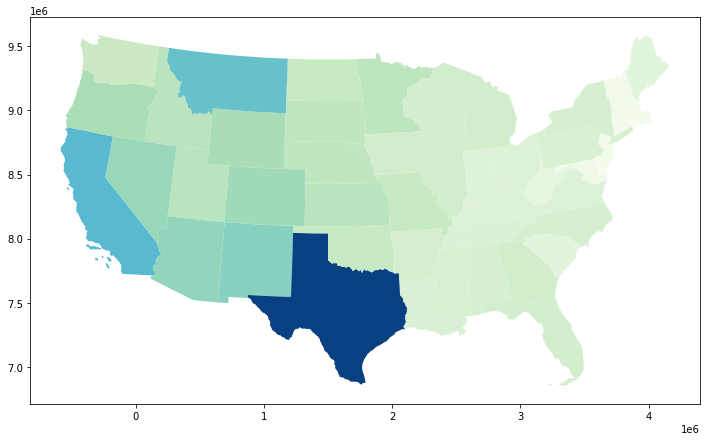

In [20]:
continental.plot(column="ALAND", cmap="GnBu", figsize=(12, 12))

In [21]:
statepop = pd.read_csv("data/statepop.csv")

In [22]:
statepop

,State,2018 Population
0,California,39776830
1,Texas,28704330
2,Florida,21312211
3,New York,19862512
4,Pennsylvania,12823989
5,Illinois,12768320
6,Ohio,11694664
7,Georgia,10545138
8,North Carolina,10390149
9,Michigan,9991177


In [23]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
continental = continental.join(statepop.set_index('State'), on='NAME')

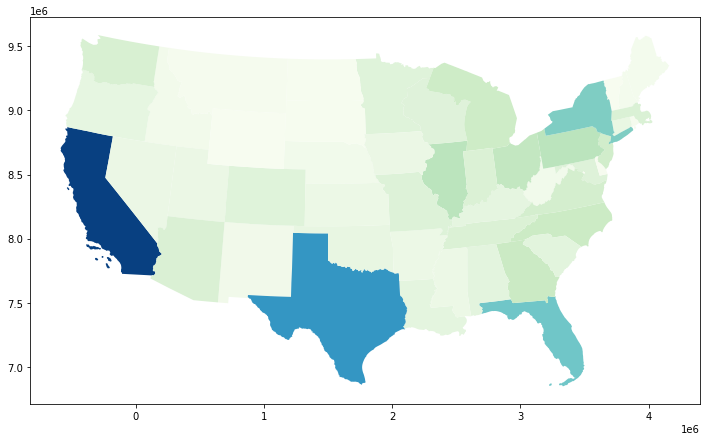

In [24]:
continental.plot(column="2018 Population", cmap="GnBu", figsize=(12, 12))